In [51]:
import pandas as pd
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from recsysUtility import RecSysUtility

In [52]:
rsUtils = RecSysUtility('//fmnas/Dataset/new/training.tsv')

In [53]:
df_chunk = pd.read_csv('//fmnas/Dataset/new/training.tsv', sep='\u0001', header=None, nrows=100000)
df_chunk = rsUtils.process_chunk_tsv(df_chunk)
df_chunk

,Text_tokens,Hashtags,Tweet_id,Present_media,Present_links,Present_domains,Tweet_type,Language,Timestamp,User_id,...,User_id_engaging,Follower_count_engaging,Following_count_engaging,Is_verified_engaging,Account_creation_time_engaging,Engagee_follows_engager,Reply_engagement_timestamp,Retweet_engagement_timestamp,Retweet_with_comment_engagement_timestamp,Like_engagement_timestamp
0,101|16493|12478|117|10105|42370|76299|100|187|...,0,39024FBE0136E046D1357196BAECFCA6,GIF,0,0,TopLevel,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581532200,3BF0702AA3337E076DA5DF54E55117D1,...,000006829BEADA9EEA695CF0C334B426,2,29,0,1568107028,False,NaN,NaN,NaN,NaN
1,101|56898|137|186|10457|97575|11373|11166|131|...,0,4AE544DF8E20622635B87B6E2B8B6D2A,0,0,0,Retweet,ECED8A16BE2A5E8871FD55F4842F16B1,1581002124,46E6134373F19D742F24D6E72FC74360,...,00000860E80C67D8C46CE57C64DE9444,225,185,0,1541013180,True,NaN,NaN,NaN,1.581009e+09
2,101|56898|137|37390|92306|19403|11205|131|8004...,0,87B10ACCFDB6603A63D1548754710328,Video,0,0,Retweet,E59EF8BB86A6D815331DDF4C467CE0C7,1581264014,DBCFEFD4018E2E89CC84C42F93F873DC,...,00000860E80C67D8C46CE57C64DE9444,222,183,0,1541013180,True,NaN,NaN,NaN,NaN
3,101|56898|137|45010|66148|10738|10976|131|107|...,0,C0E81676727D9589555541E13A6D6F8D,Photo,0,0,Retweet,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581286023,723A5C02BA1B2EDFAE0B271DF18EBEC0,...,00000A49BC40B7321B45055AC371D4E1,179,237,0,1434078931,False,NaN,NaN,NaN,NaN
4,101|56898|137|139|11447|168|168|12078|131|8946...,0,F4DA426E8C8EF7846D1FF89472BC28D2,Video,0,0,Retweet,125C57F4FA6D4E110983FB11B52EFD4E,1581431196,7A692CA6D7A76EDA2BA83FB6AD28B44D,...,00000B44A4956EA5D920FCD1C8A1A26E,56,108,0,1563441868,True,NaN,1.581431e+09,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,101|20003|42774|21256|41525|93280|89980|76897|...,0,809AAE9450BA777FAE86AE80B5E3A296,0,0,0,Quote,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581261021,0649850C4111A489D9DC2263E1EE16C8,...,04DFFC80FCF02E06F55C4E90958D8D74,99,43,0,1528063519,False,NaN,NaN,NaN,NaN
99996,101|56898|137|14261|168|15475|12023|131|20977|...,0,2863E4C43146662149BA0B486A2B2118,0,0,0,Retweet,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581364938,6E938F398EC7C7E5F850F72AAE72EE85,...,04E0014C88CF5FC9FFAABA263E60864B,171,361,0,1248444891,True,NaN,NaN,NaN,NaN
99997,101|13073|28757|106|100|14120|131|120|120|188|...,0,3C00DA35773A8010D0F8B35576CF2754,Video,0,0,TopLevel,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581264509,87F8726BC208D555EA2471B0BAA03903,...,04E001C579DF56CE25BAE7F164F90ABB,673,535,0,1524099600,False,NaN,NaN,NaN,1.581265e+09
99998,101|100|102,0,72096AB0F0543CCE4123D925FA870174,0,0,0,Quote,B9175601E87101A984A50F8A62A1C374,1581446631,2C1C04340EEB3B9D784780ABE5A29AA7,...,04E003A422A5103D9515169D62CD92B5,217,138,0,1493289766,True,NaN,NaN,NaN,NaN


In [54]:
df_labels = df_chunk[['Reply_engagement_timestamp', 'Retweet_engagement_timestamp', 'Retweet_with_comment_engagement_timestamp', 'Like_engagement_timestamp']]
df_labels = df_labels.fillna(0)
for c in df_labels.columns:
    df_labels[c] = df_labels[c].apply(lambda x: 1 if x != 0 else 0)
df_labels

,Reply_engagement_timestamp,Retweet_engagement_timestamp,Retweet_with_comment_engagement_timestamp,Like_engagement_timestamp
0,0,0,0,0
1,0,0,0,1
2,0,0,0,0
3,0,0,0,0
4,0,1,0,0
...,...,...,...,...
99995,0,0,0,0
99996,0,0,0,0
99997,0,0,0,1
99998,0,0,0,0


### Distribuzione delle label (da spostare nell'analisi dei dati sul training) 

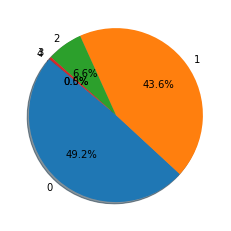

In [37]:
import matplotlib.pyplot as plt
df_labels['tot'] = df_labels['Reply_engagement_timestamp'] + df_labels['Retweet_engagement_timestamp'] + df_labels['Retweet_with_comment_engagement_timestamp'] + df_labels['Like_engagement_timestamp']
labels = df_labels['tot'].value_counts().index.values
sizes = df_labels['tot'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [55]:
def count_item(x):
    if(x != 0):
        return len(x.split('|'))

In [58]:
def generate_features(df_chunk):
    df_train = df_chunk
    #df_train = df_chunk.drop(['Reply_engagement_timestamp', 'Retweet_engagement_timestamp', 'Retweet_with_comment_engagement_timestamp', 'Like_engagement_timestamp'], axis=1)
    df_train['Text_tokens'] = df_train['Text_tokens'].apply(lambda x: count_item(x))
    df_train['Hashtags'] = df_train['Hashtags'].apply(lambda x: count_item(x))
    df_train = df_train[['Text_tokens', 'Hashtags', 'Follower_count', 'Following_count', 'Follower_count_engaging', 'Following_count_engaging', 'Engagee_follows_engager']]
    return df_train

In [57]:
df_train = generate_features(df_chunk)
df_train.head()

,Text_tokens,Hashtags,Follower_count,Following_count,Follower_count_engaging,Following_count_engaging,Engagee_follows_engager
0,63,NaN,1344732,125,2,29,False
1,27,NaN,440,412,225,185,True
2,31,NaN,443,904,222,183,True
3,50,NaN,47642,540,179,237,False
4,32,NaN,524,524,56,108,True


In [59]:
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MultiLabelBinarizer
clf = OneVsRestClassifier(XGBClassifier(n_jobs=-1, max_depth=4))
clf.fit(df_train, df_labels)

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=4,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=-1,
                                            num_parallel_tree=None,
                                            objective='binary:logistic',
                                            rando

In [60]:
def split_label_training(df):
    label_cols = ['Reply_engagement_timestamp', 'Retweet_engagement_timestamp', 'Retweet_with_comment_engagement_timestamp', 'Like_engagement_timestamp']
    df_labels = df[label_cols]
    df_labels = df_labels.fillna(0)
    for c in df_labels.columns:
        df_labels[c] = df_labels[c].apply(lambda x: 1 if x != 0 else 0)
    df_train = df.drop(label_cols, axis=1)
    return df_train, df_labels

In [61]:
df_val = pd.read_csv('//fmnas/Dataset/new/training.tsv', sep='\u0001', header=None, nrows=700000, skiprows=700000)
df_val = rsUtils.process_chunk_tsv(df_val)
df_val_train, df_val_label = split_label_training(df_val)

In [62]:
df_val_train = generate_features(df_val_train)
df_val_train.head()

,Text_tokens,Hashtags,Follower_count,Following_count,Follower_count_engaging,Following_count_engaging,Engagee_follows_engager
0,68,5.0,147,124,1720,2712,True
1,125,3.0,3535596,169,7,26,False
2,69,1.0,264358,78,105,244,False
3,51,NaN,58,230,19,42,True
4,4,NaN,3551532,6321,3,128,False


In [63]:
# Devo fare la dmatrix
import xgboost as xgb
predictions = clf.predict_proba(df_val_train)

## Calcolo delle metriche

In [64]:
from sklearn.metrics import precision_recall_curve, auc, log_loss

def compute_prauc(pred, gt):
  prec, recall, thresh = precision_recall_curve(gt, pred)
  prauc = auc(recall, prec)
  return prauc

def calculate_ctr(gt):
  positive = len([x for x in gt if x == 1])
  ctr = positive/float(len(gt))
  return ctr

def compute_rce(pred, gt):
    cross_entropy = log_loss(gt, pred)
    data_ctr = calculate_ctr(gt)
    strawman_cross_entropy = log_loss(gt, [data_ctr for _ in range(len(gt))])
    return (1.0 - cross_entropy/strawman_cross_entropy)*100.0

In [65]:
for i in range(0, 4):
    predictions_label = predictions.T[i]
    gt = df_val_label.iloc[:,i].values
    rce = compute_rce(predictions_label, gt)
    print('Label {} / RCE {}'.format(i, rce))
    prauc = compute_prauc(predictions_label, gt)
    print('Label {} / PRAUC {}'.format(i, prauc))

Label 0 / RCE 2.3321716263208447
Label 0 / PRAUC 0.047270650118619056
Label 1 / RCE 4.242825674188088
Label 1 / PRAUC 0.19306026180961117
Label 2 / RCE -1.7493526761430456
Label 2 / PRAUC 0.010561478394278706
Label 3 / RCE 3.376304001857189
Label 3 / PRAUC 0.5504517731876674
